X shape: (822010, 17)
y shape: (822010,)
Epoch 1/20, Loss: 0.688406
Epoch 2/20, Loss: 0.685065
Epoch 3/20, Loss: 0.682454
Epoch 4/20, Loss: 0.680296
Epoch 5/20, Loss: 0.678428
Epoch 6/20, Loss: 0.676751
Epoch 7/20, Loss: 0.675228
Epoch 8/20, Loss: 0.673800
Epoch 9/20, Loss: 0.672461
Epoch 10/20, Loss: 0.671193
Epoch 11/20, Loss: 0.669970
Epoch 12/20, Loss: 0.668791
Epoch 13/20, Loss: 0.667661
Epoch 14/20, Loss: 0.666556
Epoch 15/20, Loss: 0.665495
Epoch 16/20, Loss: 0.664451
Epoch 17/20, Loss: 0.663440
Epoch 18/20, Loss: 0.662456
Epoch 19/20, Loss: 0.661495
Epoch 20/20, Loss: 0.660559


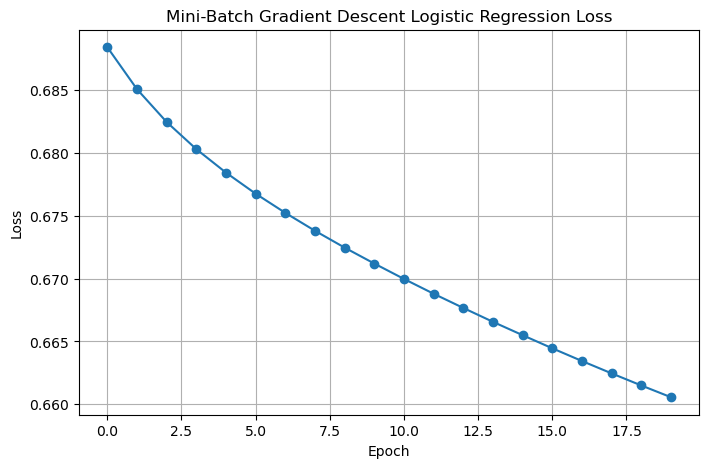

Training accuracy: 0.6028734443619908


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("C:\\Users\\Owner\\Desktop\\Fall2025\\DSCI320\\urls.csv")

feature_cols = [
    'url_length', 'num_digits', 'special_char_ratio',
    'num_hyphens', 'num_underscores', 'num_slashes',
    'num_dots', 'num_question_marks', 'num_equals',
    'num_at_symbols', 'num_percent', 'num_hashes',
    'num_ampersands', 'num_subdomains', 'is_https',
    'has_suspicious_word'
]

# Force all features to float64
X = df[feature_cols].astype(np.float64).values
X = np.hstack([np.ones((X.shape[0], 1), dtype=np.float64), X])  # add bias column

# Force target to float64
y = df["status"].astype(np.float64).values

print("X shape:", X.shape)
print("y shape:", y.shape)

# -----------------------------
# 2. Logistic functions
# -----------------------------
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z))

def logistic_loss(theta, X, y, lam=0.0):
    z = X @ theta
    p = sigmoid(z)
    eps = 1e-12
    loss = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    loss += lam/2 * np.sum(theta**2)
    return loss

def logistic_grad(theta, X, y, lam=0.0):
    z = X @ theta
    p = sigmoid(z)
    grad = X.T @ (p - y) / X.shape[0]
    grad += lam * theta
    return grad

# -----------------------------
# 3. Mini-batch gradient descent
# -----------------------------
def mini_batch_logreg(theta0, X, y, alpha=1e-4, lam=0.0, batch_size=1000, tol=1e-6, max_epochs=10):
    theta = theta0.copy()
    n_samples = X.shape[0]
    losses = []

    for epoch in range(max_epochs):
        # Shuffle data
        perm = np.random.permutation(n_samples)
        X_shuffled = X[perm]
        y_shuffled = y[perm]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            grad = logistic_grad(theta, X_batch, y_batch, lam)
            theta -= alpha * grad

        # Loss on full dataset
        loss = logistic_loss(theta, X, y, lam)
        losses.append(loss)
        print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.6f}")

        # Check convergence
        if np.linalg.norm(grad) < tol:
            print(f"Converged at epoch {epoch+1}")
            break

    return theta, losses

# -----------------------------
# 4. Run mini-batch GD
# -----------------------------
theta0 = np.zeros(X.shape[1], dtype=np.float64)
alpha = 1e-4
lam = 1e-4
batch_size = 5000
max_epochs = 20

theta_final, losses = mini_batch_logreg(theta0, X, y, alpha, lam, batch_size, max_epochs=max_epochs)

# -----------------------------
# 5. Plot loss
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(losses, marker='o')
plt.title("Mini-Batch Gradient Descent Logistic Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# -----------------------------
# 6. Predictions and accuracy
# -----------------------------
def predict(theta, X):
    return (sigmoid(X @ theta) > 0.5).astype(int)

y_pred = predict(theta_final, X)
accuracy = (y_pred == y).mean()
print("Training accuracy:", accuracy)

Accuracy: 0.9278561088064622


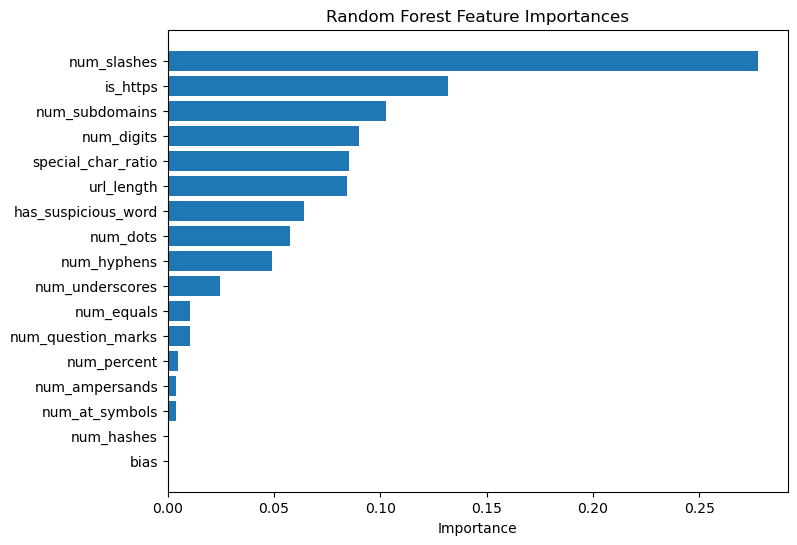

In [7]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



rf = RandomForestClassifier(n_estimators=300, max_depth=25, n_jobs=-1)
rf.fit(X_scaled, y)

print("Accuracy:", rf.score(X_scaled, y))

import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_     
indices = np.argsort(importances)[::-1]
feature_names = np.array(["bias"] + feature_cols)

plt.figure(figsize=(8,6))
plt.barh(feature_names[indices], importances[indices])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()